# Logistic Regression Assignment

- Run the below cells. If you have the data in a different directory, you'll need to change the url.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

employee_turnover = pd.read_csv('employee-turnover-balanced.csv')
employee_turnover.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.  
- `age`: Age of individual. 
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

In [2]:
# insert code
from sklearn.model_selection import train_test_split
features = [x for x in employee_turnover.columns if x != 'left_company']

X = employee_turnover[features]
y = employee_turnover['left_company']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 800
Records in test data: 200

Features:
age
frequency_of_travel
department
commuting_distance
education
satisfaction_with_environment
gender
seniority_level
position
satisfaction_with_job
married_or_single
last_raise_pct
last_performance_rating
total_years_working
years_at_company
years_in_current_job
years_since_last_promotion
years_with_current_supervisor


In [3]:
employee_turnover['left_company'].unique()

array(['No', 'Yes'], dtype=object)

In [4]:
#change dtype for left company
employee_turnover = employee_turnover.astype({"left_company": str})


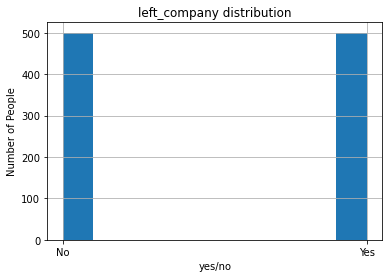

In [5]:
employee_turnover['left_company'].hist(bins=10)
plt.title('left_company distribution')
plt.xlabel('yes/no')
plt.ylabel('Number of People')
plt.show()

From the above plot it can be concluded that there will be no class imbalance problems when we would be performing classification as there are equal number of target labels, 500 each.

# Question 2
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [6]:
#check datatype 
employee_turnover.dtypes

left_company                     object
age                               int64
frequency_of_travel              object
department                       object
commuting_distance                int64
education                         int64
satisfaction_with_environment     int64
gender                           object
seniority_level                   int64
position                         object
satisfaction_with_job             int64
married_or_single                object
last_raise_pct                    int64
last_performance_rating           int64
total_years_working               int64
years_at_company                  int64
years_in_current_job              int64
years_since_last_promotion        int64
years_with_current_supervisor     int64
dtype: object

Based on the dataypes we will divide the object datatype variables into categorical and int datatype variables into numerical.

In [7]:
# employee_turnover2 = employee_turnover.drop(['left_company'], axis=1)
# employee_turnover2

In [8]:
numerical_vars = ['age', 'commuting_distance', 'education', 'satisfaction_with_environment', 'seniority_level', 'satisfaction_with_job', 'last_raise_pct', 'last_performance_rating', 'total_years_working', 'years_at_company', 'years_in_current_job', 'years_since_last_promotion', 'years_with_current_supervisor', 'frequency_of_travel', 'gender', 'married_or_single']
categorical_vars = ['department', 'position']
# categorical_Vars = employee_turnover2.select_dtypes(include="object").columns
# numerical_vars = employee_turnover2.select_dtypes(exclude="object").columns
numerical_vars

['age',
 'commuting_distance',
 'education',
 'satisfaction_with_environment',
 'seniority_level',
 'satisfaction_with_job',
 'last_raise_pct',
 'last_performance_rating',
 'total_years_working',
 'years_at_company',
 'years_in_current_job',
 'years_since_last_promotion',
 'years_with_current_supervisor',
 'frequency_of_travel',
 'gender',
 'married_or_single']

In [9]:
categorical_vars

['department', 'position']

# Question 3
- Determine if any numerical variables risk multicolinearity.  
- Remove those variables (if any) from your numerical_vars list.  
- Why did you or did not remove any?

In [10]:
#employee_turnover.gender.value_counts()
#employee_turnover.frequency_of_travel.value_counts()
#employee_turnover.married_or_single.value_counts()
#employee_turnover.department.value_counts()
employee_turnover.position.value_counts()

Sales Executive              223
Laboratory Technician        211
Research Scientist           206
Sales Representative          82
Manufacturing Director        80
Healthcare Representative     74
Manager                       55
Human Resources               37
Research Director             32
Name: position, dtype: int64

In [11]:

 
# # compare with each column
# [vif(X.values, index) for index in range(len(numerical_vars))]
 
# # Removing multicollinearity from the dataset using vif
# from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
# # compare with each columns
# for i in range(len(numerical_vars)):
#     vif_list = [vif(X.values, index) for index in range(len(numerical_vars))]
#     maxvif = max(vif_list)
#     print("Max VIF value is ", maxvif)                     
#     drop_index = vif_list.index(maxvif)
#     print("For Independent variable", numerical_vars[drop_index])
    
#     if maxvif > 10:
        
#         print("Deleting", numerical_vars[drop_index])
#         numerical_vars = numerical_vars.delete(drop_index)
#         print("Final Independent_variables ", numerical_vars)


# reference: https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
from statsmodels.stats.outliers_influence import variance_inflation_factor

#converting gender,frequncy of travel and married_or_single to numerical data

# creating dummies for gender
employee_turnover['gender'] = employee_turnover['gender'].map({'Male':0, 'Female':1})
# creating dummies for frequency_of_travel
employee_turnover['frequency_of_travel'] = employee_turnover['frequency_of_travel'].map({'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2})
# creating dummies for married_or_single
employee_turnover['married_or_single'] = employee_turnover['married_or_single'].map({'Single':0, 'Married':1, 'Divorced':2})
  
# the numeric variables set
X = employee_turnover[numerical_vars]
  
# VIF dataframe to calculate VIFs
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                          feature        VIF
0                             age  27.804800
1              commuting_distance   2.447119
2                       education   8.779774
3   satisfaction_with_environment   6.178544
4                 seniority_level  10.756412
5           satisfaction_with_job   6.364285
6                  last_raise_pct  40.572710
7         last_performance_rating  84.084786
8             total_years_working  11.682316
9                years_at_company   9.756588
10           years_in_current_job   7.770919
11     years_since_last_promotion   2.631773
12  years_with_current_supervisor   6.968768
13            frequency_of_travel   5.680372
14                         gender   1.749135
15              married_or_single   2.244827


From the above output we consider the 3 features who have the highest VIF values.
1.last_performance_rating
2.last_raise_pct
3.age
In this order. 
i.e.these variables have the highest risk of multicollinearity.

Let us drop these from the numerical_vars set.

In [12]:
numerical_vars.remove('last_performance_rating')
# the numeric variables set
X = employee_turnover[numerical_vars]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                          feature        VIF
0                             age  25.011899
1              commuting_distance   2.440504
2                       education   8.428847
3   satisfaction_with_environment   5.824476
4                 seniority_level  10.670318
5           satisfaction_with_job   6.214206
6                  last_raise_pct  13.095359
7             total_years_working  11.388063
8                years_at_company   9.746196
9            years_in_current_job   7.740068
10     years_since_last_promotion   2.628189
11  years_with_current_supervisor   6.944214
12            frequency_of_travel   5.093462
13                         gender   1.735276
14              married_or_single   2.240899


Here we see that the risk for age is the highest so we drop 'age'.

In [13]:
numerical_vars.remove('age')
# the numeric variables set
X = employee_turnover[numerical_vars]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                          feature        VIF
0              commuting_distance   2.440123
1                       education   7.733854
2   satisfaction_with_environment   5.589054
3                 seniority_level  10.580857
4           satisfaction_with_job   5.790747
5                  last_raise_pct  11.427433
6             total_years_working   9.218345
7                years_at_company   9.657833
8            years_in_current_job   7.739936
9      years_since_last_promotion   2.628077
10  years_with_current_supervisor   6.944201
11            frequency_of_travel   5.031148
12                         gender   1.732018
13              married_or_single   2.173337


In [14]:
numerical_vars.remove('last_raise_pct')
# the numeric variables set
X = employee_turnover[numerical_vars]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                          feature        VIF
0              commuting_distance   2.358057
1                       education   6.878753
2   satisfaction_with_environment   5.034598
3                 seniority_level  10.453781
4           satisfaction_with_job   5.455665
5             total_years_working   9.209864
6                years_at_company   9.605374
7            years_in_current_job   7.723103
8      years_since_last_promotion   2.613043
9   years_with_current_supervisor   6.858009
10            frequency_of_travel   4.821304
11                         gender   1.721624
12              married_or_single   2.163672


In [18]:
numerical_vars

['commuting_distance',
 'education',
 'satisfaction_with_environment',
 'seniority_level',
 'satisfaction_with_job',
 'total_years_working',
 'years_at_company',
 'years_in_current_job',
 'years_since_last_promotion',
 'years_with_current_supervisor',
 'frequency_of_travel',
 'gender',
 'married_or_single']

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124.  

In [19]:
from sklearn.model_selection import train_test_split

def generate_splits():
    y = employee_turnover['left_company']
    X = employee_turnover[[x for x in employee_turnover.columns if x != 'left_company']]

    return train_test_split(X, y, test_size=0.2, random_state=124)

X_train, X_test, y_train, y_test = generate_splits()

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Training examples: 800
Test examples: 200

Features:
age
frequency_of_travel
department
commuting_distance
education
satisfaction_with_environment
gender
seniority_level
position
satisfaction_with_job
married_or_single
last_raise_pct
last_performance_rating
total_years_working
years_at_company
years_in_current_job
years_since_last_promotion
years_with_current_supervisor


# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [26]:
#creating numerical and categorical data pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

#numerical data pipeline
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

#categorical data pipeline
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer,numerical_vars ),
        ("cat", categorical_transformer, categorical_vars),
    ]
)

#verifying 
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', numeric_transformer, numerical_vars), ('create_dummies', categorical_transformer, categorical_vars)])
processing_pipeline.fit_transform(X_train, y_train)

#using fit-transform to print shape
processing_pipeline.fit_transform(X_train, y_train).shape

# # Defining the steps in the categorical pipeline
# categorical_pipeline = Pipeline(steps=[
#     ('categorical_transformer', CategoricalTransformer()),
#     ('one_hot_encoder', OneHotEncoder(sparse=False))])

# # Defining the steps in the numerical pipeline
# numerical_pipeline = Pipeline(steps=[
#     ('numeric_transformer', NumericalTransformer()),
#     ('imputer', SimpleImputer(strategy='median')),
#     ('std_scaler', StandardScaler())])

# # Combining numerical and categorical pipeline into one full big pipeline horizontally
# # using FeatureUnion
# union_pipeline = FeatureUnion(transformer_list=[
#     ('categorical_pipeline', categorical_pipeline),
#     ('numerical_pipeline', numerical_pipeline)])

# # Combining the custom imputer with the categorical and numerical pipeline
# preprocess_pipeline = Pipeline(steps=[('custom_imputer', CustomImputer()),
#                                       ('full_pipeline', union_pipeline)])



(800, 25)

# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [27]:
from sklearn.linear_model import LogisticRegression

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), ('logreg', LogisticRegression(penalty='none'))])
modeling_pipeline.fit(X_train, y_train)

/Users/shreya/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['commuting_distance',
                                                   'education',
                                                   'satisfaction_with_environment',
                                                   'seniority_level',
                                                   'satisfaction_with_job',
                                                   'total_years_working',
                                                   'years_at_company',
                                         

Insert comments here

In [30]:
#accuracy for the test dataset
from sklearn.metrics import roc_auc_score

def generate_probs(X, model=modeling_pipeline):
    return model.predict_proba(X)[:, 1]

test_scores=roc_auc_score(y_test, generate_probs(X_test))

0.7214350316551099

In [31]:
#accuracy for train dataset
train_scores=roc_auc_score(y_train, generate_probs(X_train))

0.7806890860325975

If the model performs better on the training set than on the test set, it means that the model is likely overfitting. So from the above accuracy calculations the model is overfitting.

# Question 7
What would you recommend as potential next steps for continuing to develop and evaluate a model?

Insert comments here

To resolve the overfitting issue there can be a few logical solutions.
1.Training with more data.
https://corporatefinanceinstitute.com/resources/knowledge/other/overfitting/
2.Maybe reduce the complexity of the dataset, reduce the number of features.
3.Ridge or L2 regularization can be done in order to create hyperparameters.